In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
data = pd.read_csv(
    'Data/Salesstore.csv'
)

In [5]:
data.shape

(730, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_ID              730 non-null    int64  
 1   Order_Priority        730 non-null    object 
 2   Order_Quantity        730 non-null    int64  
 3   Sales                 730 non-null    float64
 4   Ship_Mode             730 non-null    object 
 5   Profit                730 non-null    float64
 6   Customer_Name         730 non-null    object 
 7   Region                730 non-null    object 
 8   Customer_Segment      730 non-null    object 
 9   Product_Category      730 non-null    object 
 10  Product_Sub-Category  730 non-null    object 
 11  Product_Name          730 non-null    object 
 12  Product_Container     730 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 74.3+ KB


In [7]:
data.head()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


In [8]:
data.describe()

,Order_ID,Order_Quantity,Sales,Profit
count,730.000000,730.000000,730.000000,730.000000
mean,29721.597260,24.857534,1502.777653,207.479233
std,17350.560439,14.182970,2893.936648,878.631028
min,35.000000,1.000000,8.600000,-4437.910000
25%,14479.000000,13.000000,171.098375,-77.132500
50%,29350.500000,25.000000,438.700000,0.035000
75%,44978.500000,37.000000,1480.855000,180.000000
max,59909.000000,50.000000,27663.920000,8417.570000


<AxesSubplot:ylabel='Density'>

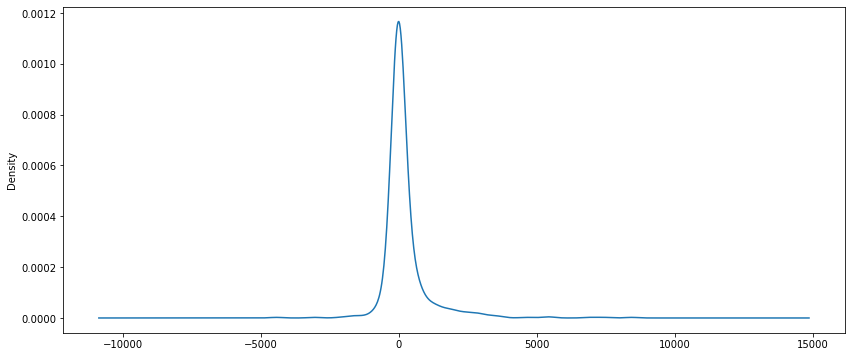

In [9]:
data['Profit'].plot(kind='kde', figsize=(14,6))

<AxesSubplot:>

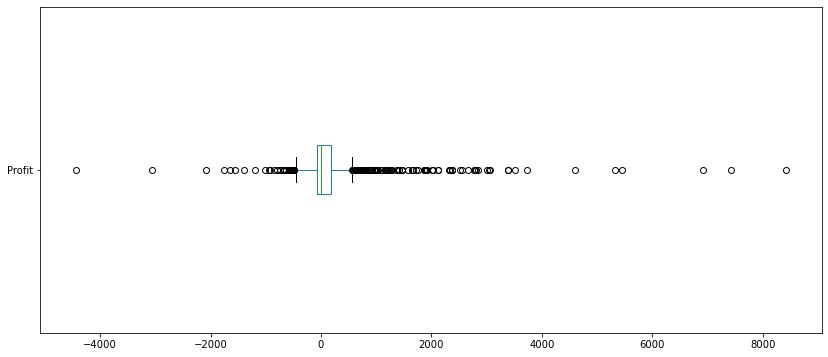

In [10]:
data['Profit'].plot(kind='box', vert=False, figsize=(14,6))

<AxesSubplot:ylabel='Frequency'>

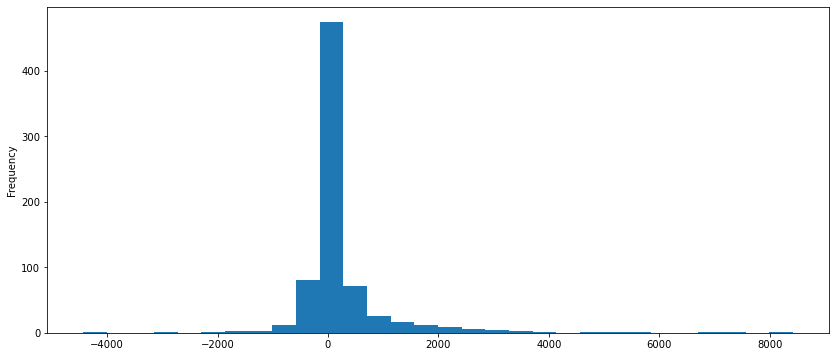

In [11]:
data['Profit'].plot(kind='hist', bins=30, figsize=(14,6))

In [12]:
data['Customer_Name'].value_counts()

Sally Knutson      19
Jack Lebron        17
Joy Smith          16
Bill Donatelli     13
Shahid Shariari    13
                   ..
Rick Duston         1
Angele Hood         1
Aaron Bergman       1
Cari Schnelling     1
Joy Bell            1
Name: Customer_Name, Length: 173, dtype: int64

<AxesSubplot:ylabel='Order_Priority'>

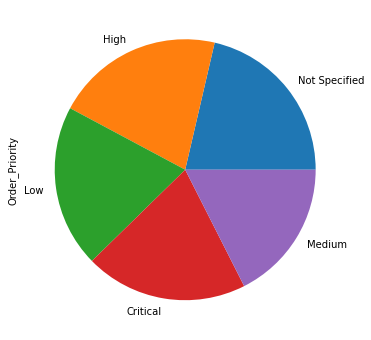

In [16]:
data['Order_Priority'].value_counts().plot(kind='pie',figsize=(6,6))

Text(0.5, 0, 'Priority')

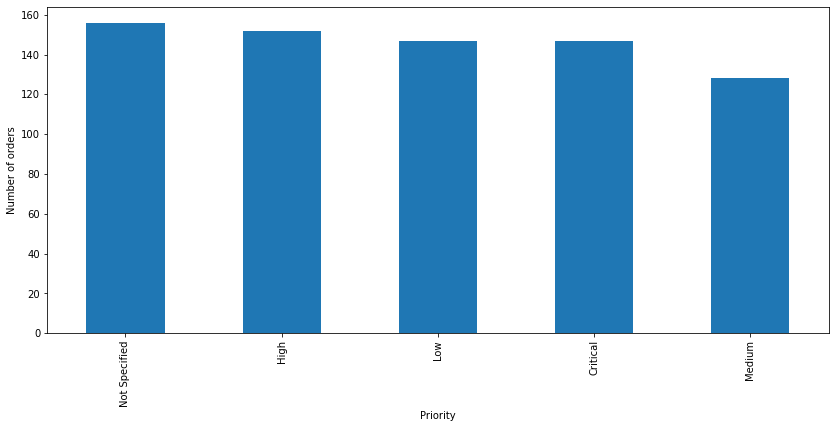

In [19]:
ax=data['Order_Priority'].value_counts().plot(kind='bar',figsize=(14,6))
ax.set_ylabel('Number of orders')
ax.set_xlabel('Priority')

In [21]:
corr=data.corr()
corr

,Order_ID,Order_Quantity,Sales,Profit
Order_ID,1.000000,0.042736,-0.029934,-0.040251
Order_Quantity,0.042736,1.000000,0.204255,0.197149
Sales,-0.029934,0.204255,1.000000,0.595711
Profit,-0.040251,0.197149,0.595711,1.000000


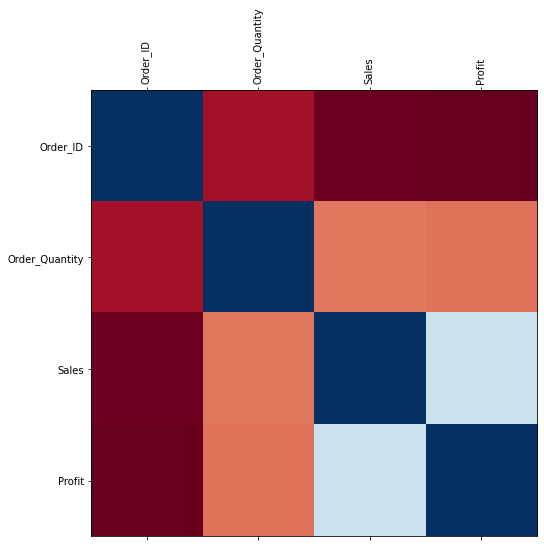

In [22]:
fig=plt.figure(figsize=(8,8))
plt.matshow(corr,cmap='RdBu',fignum=fig.number)
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical');
plt.yticks(range(len(corr.columns)),corr.columns);

<AxesSubplot:xlabel='Order_Quantity', ylabel='Profit'>

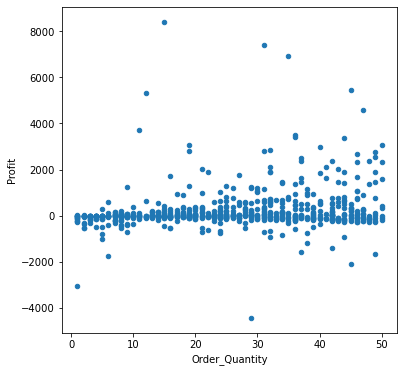

In [23]:
data.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(6,6))

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

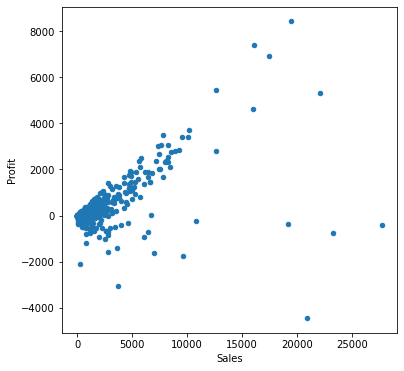

In [24]:
data.plot(kind='scatter', x='Sales', y='Profit', figsize=(6,6))

<AxesSubplot:title={'center':'Profit'}, xlabel='[Order_Priority]'>

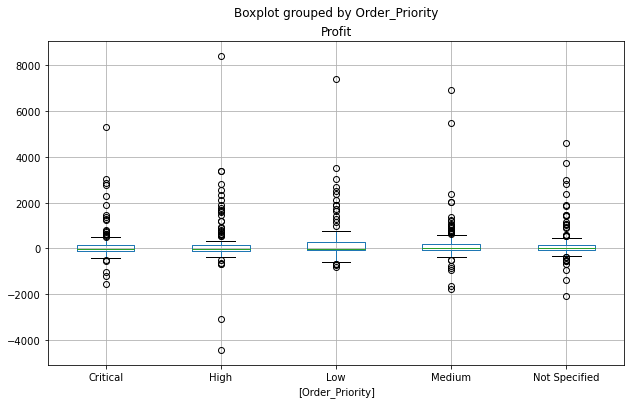

In [27]:
data[['Order_Priority', 'Profit']].boxplot(by='Order_Priority', figsize=(10,6))

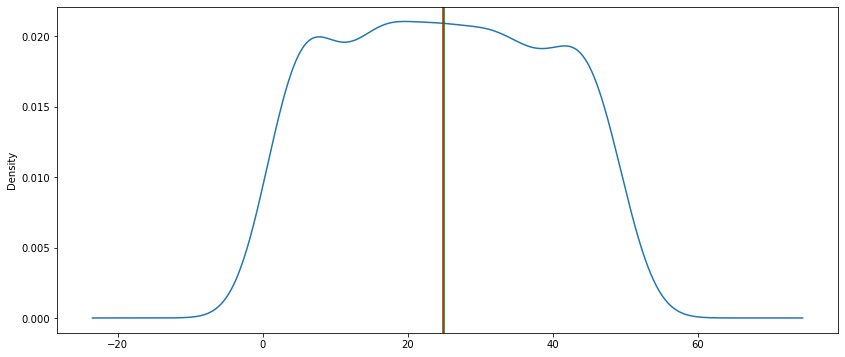

In [28]:
ax = data['Order_Quantity'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(data['Order_Quantity'].mean(), color='red')
ax.axvline(data['Order_Quantity'].median(), color='green')

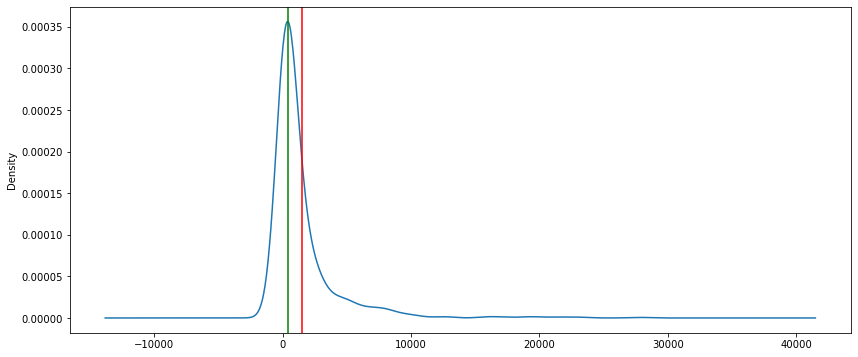

In [29]:
ax = data['Sales'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(data['Sales'].mean(), color='red')
ax.axvline(data['Sales'].median(), color='green')

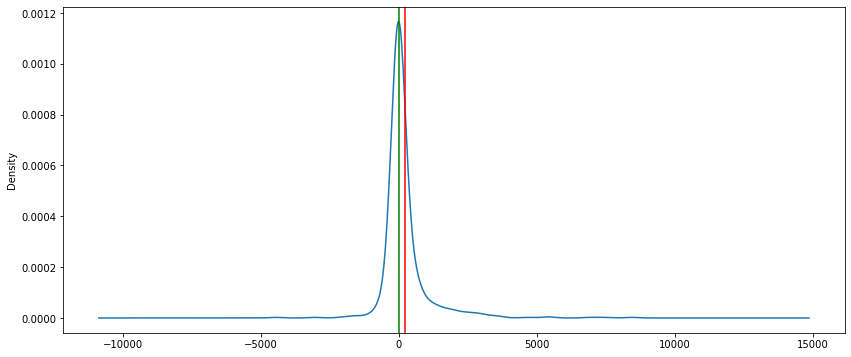

In [30]:
ax = data['Profit'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(data['Profit'].mean(), color='red')
ax.axvline(data['Profit'].median(), color='green')

Order_Quantity       AxesSubplot(0.125,0.536818;0.227941x0.343182)
Sales             AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Profit            AxesSubplot(0.672059,0.536818;0.227941x0.343182)
dtype: object

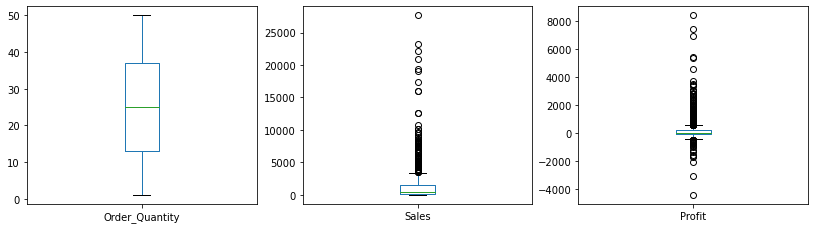

In [33]:
boxplot_cols = ['Order_Quantity', 'Sales','Profit']

data[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

In [31]:
data.head()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


In [36]:
data['Revenue_per_Order_Quantity'] = data['Sales'] / data['Order_Quantity']

data['Revenue_per_Order_Quantity'].head()


0    21.0
1    35.0
2     7.0
3     6.0
4    24.0
Name: Revenue_per_Order_Quantity, dtype: float64

<AxesSubplot:ylabel='Density'>

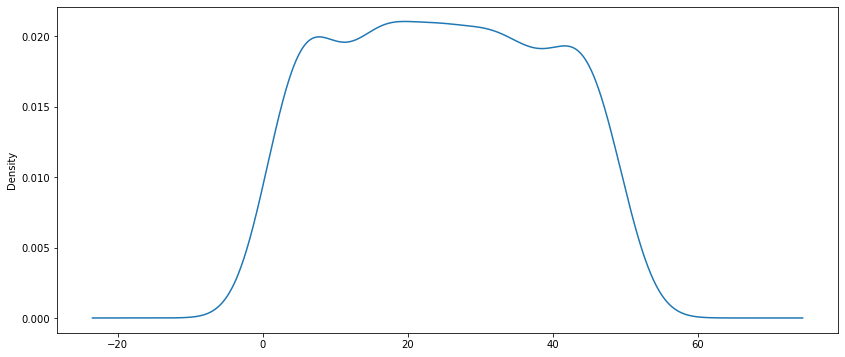

In [39]:
data['Revenue_per_Order_Quantity'].plot(kind='density', figsize=(14,6))

In [41]:
#get all orders by express air
data.loc[data['Ship_Mode'] == 'Express Air']

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container,Revenue_per_Order_Quantity
0,643,High,132.467619,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box,21.0
1,8995,High,96.855143,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box,35.0
2,9127,Not Specified,291.365714,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box,7.0
3,26272,Low,150.990000,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box,6.0
4,36646,Medium,48.672917,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,21091,High,8.460313,270.73,Express Air,-54.57,Bill Donatelli,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,GBC Instant Index™ System for Binding Systems,Small Box,32.0
245,28420,Low,22.820000,45.64,Express Air,-0.11,Bill Donatelli,Ontario,Corporate,Office Supplies,Envelopes,Park Ridge™ Embossed Executive Business Envelopes,Small Box,2.0
246,33255,Critical,5.695263,108.21,Express Air,-50.02,Russell Applegate,Ontario,Home Office,Office Supplies,Paper,Xerox 4200 Series MultiUse Premium Copy Paper ...,Small Box,19.0
247,35584,Medium,10.022000,150.33,Express Air,-98.23,Joel Jenkins,Ontario,Corporate,Office Supplies,Storage & Organization,Filing/Storage Totes and Swivel Casters,Small Box,15.0


In [42]:
#get mean of sales shipped by Express Air
data.loc[data['Ship_Mode'] == 'Express Air', 'Sales'].mean()

1607.4938774834438

In [45]:
#get mean of sales shipped by Express Air and have high priority
data.loc[(data['Ship_Mode'] == 'Express Air' )& (data['Order_Priority']=='High'), 'Sales'].mean()

1869.448409090909

In [46]:
 #Increase the sales by 10% to every sale made in Corporate Business
data.loc[data['Customer_Segment'] == 'Corporate', 'Sales'] *= 1.1

In [8]:
data.loc[data['Customer_Segment'] == 'Corporate', 'Sales'].head()

0     2781.82
2     2039.56
9     2475.08
10     446.53
14    2954.14
Name: Sales, dtype: float64

In [11]:
#Get the top-5 sales with the highest revenue
data.sort_values(['Sales'], ascending=False).head(5)

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
20,41895,Critical,8,27663.92,Regular Air,-391.92,Tony Chapman,West,Consumer,Technology,Copiers and Fax,Canon imageCLASS 2200 Advanced Copier,Large Box
45,36677,Low,38,23255.61,Regular Air,-734.33,Jack Lebron,Atlantic,Corporate,Technology,Copiers and Fax,Canon Image Class D660 Copier,Large Box
85,12419,Critical,12,22079.47,Regular Air,5322.14,Sylvia Foulston,Northwest Territories,Corporate,Technology,Office Machines,Polycom ViewStation™ Adapter H323 Videoconfere...,Medium Box
55,52035,High,29,20872.16,Regular Air,-4437.91,Roy Skaria,West,Corporate,Technology,Copiers and Fax,Canon PC1060 Personal Laser Copier,Large Box
422,39364,High,15,19417.55,Regular Air,8417.57,Jamie Kunitz,Northwest Territories,Corporate,Office Supplies,Binders and Binder Accessories,Fellowes PB500 Electric Punch Plastic Comb Bin...,Small Box


In [14]:
#sales.sort_values(['Revenue'], ascending=False).head(1)

cond = data['Sales'] == data['Sales'].max()

data.loc[cond]

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
20,41895,Critical,8,27663.92,Regular Air,-391.92,Tony Chapman,West,Consumer,Technology,Copiers and Fax,Canon imageCLASS 2200 Advanced Copier,Large Box


Text(0.5, 0, 'Customer_Segment')

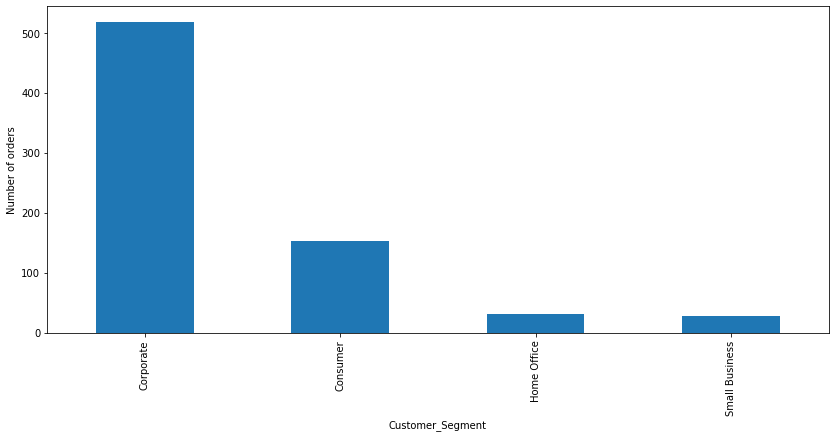

In [15]:
ax=data['Customer_Segment'].value_counts().plot(kind='bar',figsize=(14,6))
ax.set_ylabel('Number of orders')
ax.set_xlabel('Customer_Segment')

Text(0.5, 0, 'Region')

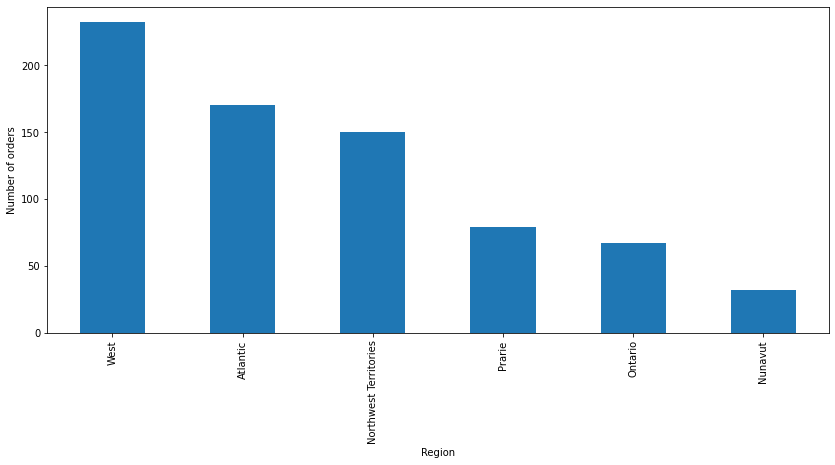

In [16]:
ax=data['Region'].value_counts().plot(kind='bar',figsize=(14,6))
ax.set_ylabel('Number of orders')
ax.set_xlabel('Region')

Text(0.5, 0, 'Product_Category')

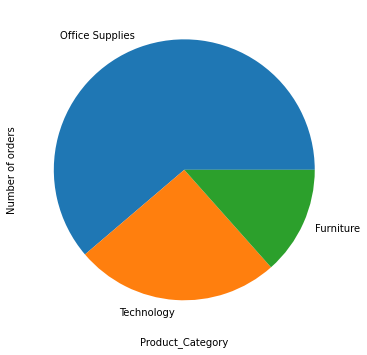

In [18]:
ax=data['Product_Category'].value_counts().plot(kind='pie',figsize=(6,6))
ax.set_ylabel('Number of orders')
ax.set_xlabel('Product_Category')